In [19]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sns.set_style('whitegrid')
sns.set_context('poster')

import numpy as np
import scipy.constants as consts
import scipy.integrate as integ
import sys
sys.path.append('..')

In [21]:
import equil_solver as es
reload(es)
from scipy.interpolate import splev 

In [29]:
profile = es.UnitlessSmoothedCoreSkin(lambda_bar=4.5, k_bar=0.2, epsilon=1.0)
tck_splines = profile.get_tck_splines()
t, c, k = tck_splines['b_theta']

In [33]:
def complete_profile_plots(profile):
    
    tck_splines = profile.get_tck_splines()
    r = np.linspace(0, 1, 250)
    
    j_skin = profile.j_skin
    #current = splev(1, tck_splines['b_theta'])*2.*np.pi*1/(profile.mu_0)
    b_z0 = profile.b_z0
    
    fig = plt.figure(1, figsize=(20,10))
    gs1 = gridspec.GridSpec(2, 3)
    axs = [fig.add_subplot(ss) for ss in gs1]
    axs = np.asarray(axs).reshape(2,3)
    
    axs[0, 0].plot(r, splev(r, tck_splines['j_z']))
    axs[0, 1].plot(r, splev(r, tck_splines['b_theta']))
    axs[0, 2].plot(r, splev(r, tck_splines['p_prime']))
    axs[1, 0].plot(r, splev(r, tck_splines['pressure']))
    axs[1, 1].plot(r, splev(r, tck_splines['q']))
    
    for i in range(axs.shape[0]):
        for j in range(axs.shape[1]):
            axs[i, j].set_xlabel(r'$r$', fontsize=25)
    axs[0, 0].set_ylabel(r'$j_{z}$', fontsize=25)
    axs[0, 1].set_ylabel(r'$B_{\theta}$', fontsize=25)
    axs[0, 2].set_ylabel(r'$\frac{\partial{p}}{\partial{r}}$', fontsize=25)
    axs[1, 0].set_ylabel(r'$p$', fontsize=25)
    axs[1, 1].set_ylabel(r'$q$', fontsize=25)    
    
    
    #fig.suptitle(r'$j_{skin}=$'+'{:4.3f}'.format(j_skin)+
    #             '  total current ='+'{:3.3f}'.format(current)+
    #             r'  $B_{z}=$'+'{:3.3f}'.format(b_z0), fontsize=25)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

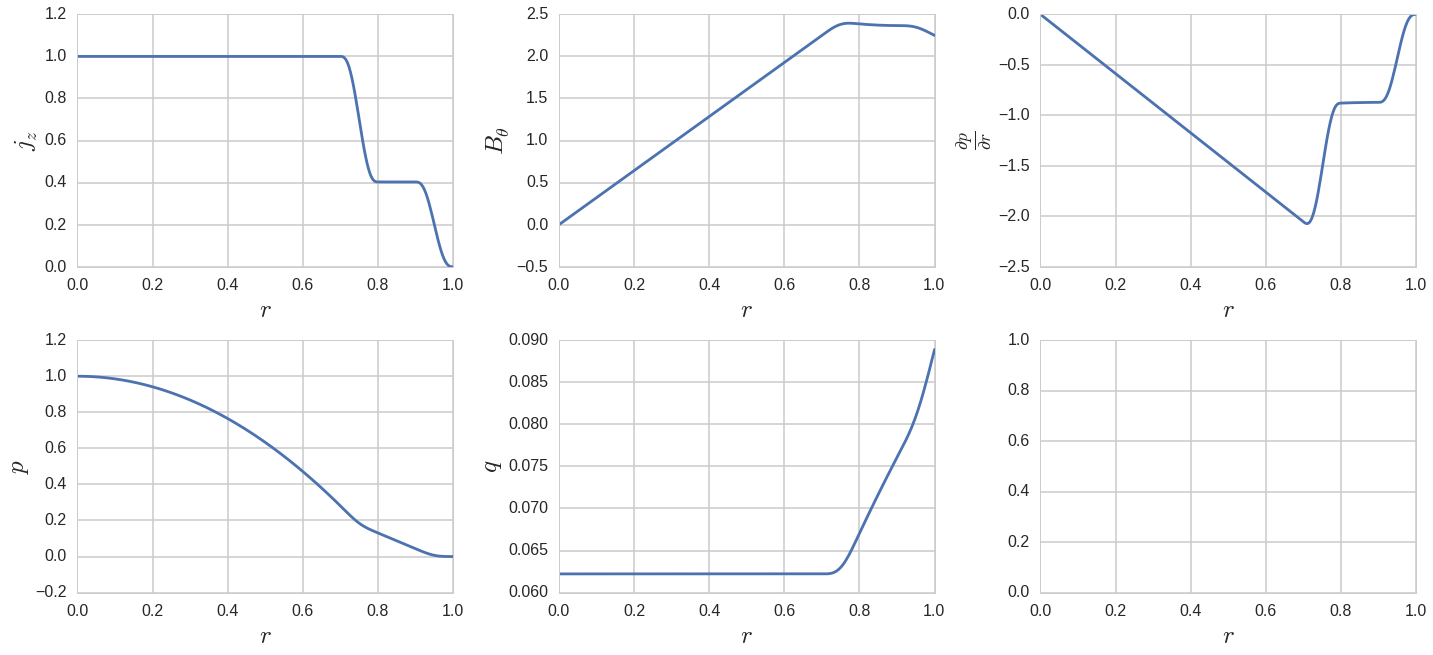

In [34]:
complete_profile_plots(es.UnitlessSmoothedCoreSkin(lambda_bar=4.5, k_bar=0.2, epsilon=1.0))